In [1]:
import rdkit

import pandas as pd
import numpy as np
from copy import deepcopy

from torch_geometric.datasets import MoleculeNet
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import AllChem

In [2]:
import custom_regression_functions
import custom_models
from custom_regression_functions import *
from custom_models import *
import custom_general_functions
from custom_general_functions import *

In [3]:
import dgl_functions
from dgl_functions import *
import dgl_models
from dgl_models import *

In [4]:
data, data_y = load_esol()

In [5]:
data

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.770,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.300,Cc1occc1C(=O)Nc2ccccc2
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.060,CC(C)=CCCC(C)=CC(=O)
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.870,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.330,c1ccsc1
...,...,...,...,...,...,...,...,...,...,...
1123,halothane,-2.608,1,197.381,0,0,0,0.00,-1.710,FC(F)(F)C(Cl)Br
1124,Oxamyl,-0.908,1,219.266,1,0,1,71.00,0.106,CNC(=O)ON=C(SC)C(=O)N(C)C
1125,Thiometon,-3.323,1,246.359,0,0,7,18.46,-3.091,CCSCCSP(=S)(OC)OC
1126,2-Methylbutane,-2.245,1,72.151,0,0,1,0.00,-3.180,CCC(C)C


In [6]:
from padelpy import from_smiles


In [7]:
#padel_list = []
#for index, entry in enumerate(smiles_list):
#    padel_descriptors = from_smiles(entry[-1].tolist(), fingerprints=True)
#    padel_list.append

In [8]:
#padel_descriptors = from_smiles([x[-1] for x in smiles_list], fingerprints=True)
#padel_descriptors = from_smiles(data["smiles"].tolist(), fingerprints=True)

In [9]:
dgl_graph_list = create_dgl_graph(data, data_y)

processed_data = process_dgl_graph(dgl_graph_list)

There was a problem with 
C
 at index 934


In [10]:
train_dataset, test_dataset, val_dataset = create_train_test_graphs(processed_data, train_percentage= 0.8, apply_scaffold_split = False )

loader, test_loader = create_dgl_dataloader(train_dataset, test_dataset, batch_size=64)

In [11]:
model, device, optimizer, loss_fn = initialize_dgl_regression_model(in_feats=train_dataset[0][0].ndata["h"].shape[-1], hidden_feats=None, gnn_norm=None, activation=None, residual=None, batchnorm=None, dropout=None, classifier_hidden_feats=128, classifier_dropout=0.0, n_tasks=1, predictor_hidden_feats=128, predictor_dropout=0.0)

GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x00000121057C5E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=64, bias=True)
        (bn_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): GCNLayer(
        (graph_conv): GraphConv(in=64, out=64, normalization=none, activation=<function relu at 0x00000121057C5E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=64, out_features=64, bias=True)
        (bn_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=64, out_features=1, bias=True)
        (1): Sigmoid(

Epoch 0 | Train Loss 11.586825784047445 | Validation Loss 9.309566020965576
Epoch 10 | Train Loss 1.3743245522181193 | Validation Loss 1.1343278735876083
Epoch 20 | Train Loss 0.686240287621816 | Validation Loss 0.7353005260229111
Epoch 30 | Train Loss 0.5833824038505554 | Validation Loss 0.6522438526153564
Epoch 40 | Train Loss 0.7625468174616495 | Validation Loss 0.6587071418762207
Epoch 50 | Train Loss 0.5716550399859747 | Validation Loss 0.5845685824751854
Epoch 60 | Train Loss 0.6313178459803264 | Validation Loss 0.5067888051271439
Epoch 70 | Train Loss 0.3832608620325724 | Validation Loss 0.47790391743183136
Epoch 80 | Train Loss 0.8606286346912384 | Validation Loss 0.5556903630495071
Epoch 90 | Train Loss 0.5406271358331044 | Validation Loss 0.46963413804769516
Epoch 100 | Train Loss 0.40599088072776796 | Validation Loss 0.47473908960819244
Epoch 110 | Train Loss 0.37880292038122815 | Validation Loss 0.44645021855831146
Epoch 120 | Train Loss 0.5263545582691829 | Validation Loss

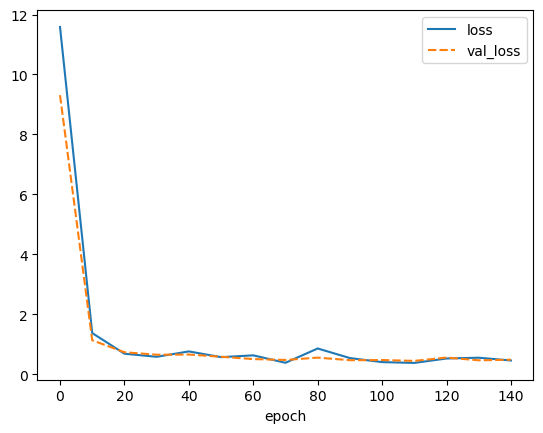

In [12]:
model, best_model_weights, losses, val_losses = regression_dgl_train(model, loader, test_loader, device, loss_fn, optimizer, log_time=10, max_epochs=1000, apply_early_stopping = True, early_stopping_patience = 50, finally_plot_losses = True)

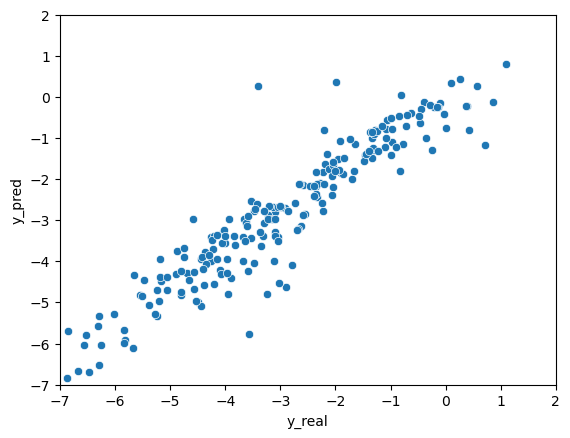

In [13]:
mean_mse, mean_l1 = predict_dgl_regression(model, test_loader, device, plot_final = True)